In [499]:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


In [500]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 640x480 with 0 Axes>

In [501]:
import numpy as np
import pandas as pd

In [502]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.signal import savgol_filter

In [503]:
import gwsurrogate


In [504]:
# gwsurrogate.catalog.pull('NRHybSur3dq8')


In [505]:
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')


Loaded NRHybSur3dq8 model


In [506]:
sur.h5filename

'/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/gwsurrogate/surrogate_downloads//NRHybSur3dq8.h5'

In [507]:
sur.hard_param_lims

[10.01, 1]

In [508]:
sur.keywords

{'Precessing': False,
 'Hybridized': True,
 'Eccentric': False,
 'Tidal': False,
 'nonGR': False}

In [509]:
sur.name

'NRHybSur3dq8'

In [510]:
sur.soft_param_lims

[8.01, 0.801]

In [699]:
# q = 7
# chiA = [0, 0, 0.5]
# chiB = [0, 0, -0.7]

# q = 1
q = 2
chiA = [0, 0, 0.]
chiB = [0, 0, 0.]

dt = 0.1        # step size, Units of M
# f_low = 5e-3    # initial frequency, Units of cycles/M
# f_low = 1e-2
f_low = 0.4e-2
# f_low = 1e-3
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

In [700]:
t.shape

(97923,)

In [701]:
h.keys()

dict_keys([(2, 2), (3, 2), (4, 4), (3, 3), (3, 0), (3, 1), (2, 1), (2, 0), (4, 3), (4, 2), (5, 5)])

In [702]:
dyn

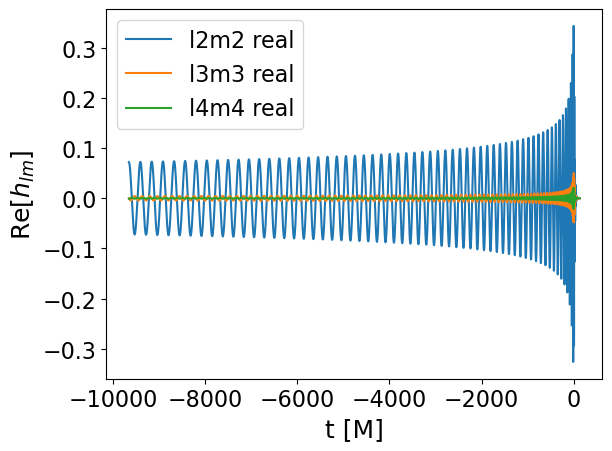

In [703]:
plt.plot(t, h[(2,2)].real, label='l2m2 real')
plt.plot(t, h[(3,3)].real, label='l3m3 real')
plt.plot(t, h[(4,4)].real, label='l4m4 real')
plt.ylabel('Re[$h_{lm}$]', fontsize=18)
plt.xlabel('t [M]', fontsize=18)
plt.legend()

(-100.0, 100.0)

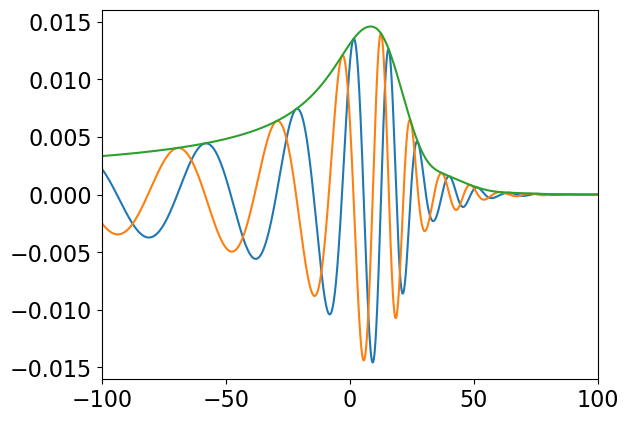

In [704]:
plt.plot(t, h[(3,2)].real)
plt.plot(t, h[(3,2)].imag)
plt.plot(t, np.abs(h[(3,2)]))
plt.xlim(-100, 100)

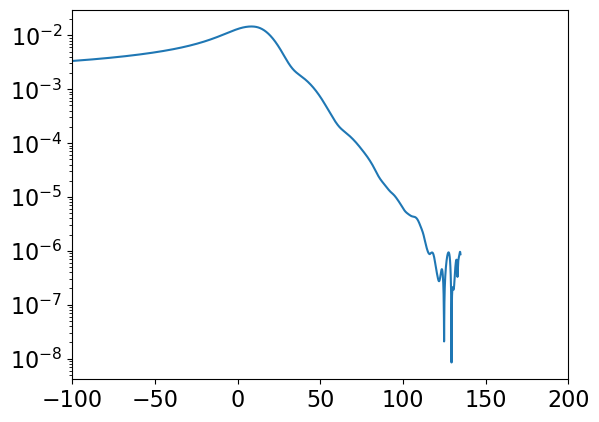

In [705]:
plt.plot(t, np.abs(h[(3,2)]))
plt.xlim(-100, 200)
plt.yscale('log')

In [706]:
class Modes:
    def __init__(self, times, h):
        self.h = h
        self.times = times
        
    def get_amp_from_strain(self, l, m):
        return np.abs(self.h[(l, m)])
        
    def get_phase_from_strain(self, l, m):
        return np.unwrap(np.angle(self.h[(l, m)]))
        
    def get_frequency_from_strain(self, l, m, filter_params=None):
        f = IUS(self.times, self.get_phase_from_strain(l,m)).derivative()(self.times)

        if filter_params != None:
            return savgol_filter(f, filter_params['window_length'], filter_params['polyorder'])
        else:
            return f


In [707]:
modes = Modes(t, h)

In [708]:
h.keys()

dict_keys([(2, 2), (3, 2), (4, 4), (3, 3), (3, 0), (3, 1), (2, 1), (2, 0), (4, 3), (4, 2), (5, 5)])

In [709]:
def delta_phi_fn(m):
    z = (-1)*(-1.j)**m
    return np.arctan2(z.imag, z.real)

In [710]:
delta_phi = {
    (2,2):delta_phi_fn(2),
    (2,1):delta_phi_fn(1),
    (3,3):delta_phi_fn(3),
    (3,2):delta_phi_fn(2),
    (3,1):delta_phi_fn(1),
    (4,4):delta_phi_fn(4),
    (4,3):delta_phi_fn(3),
    (5,5):delta_phi_fn(5),
    (5,4):delta_phi_fn(4),
}

In [711]:
delta_phi_fn(5)

1.5707963267948966

(-5.0, 5.0)

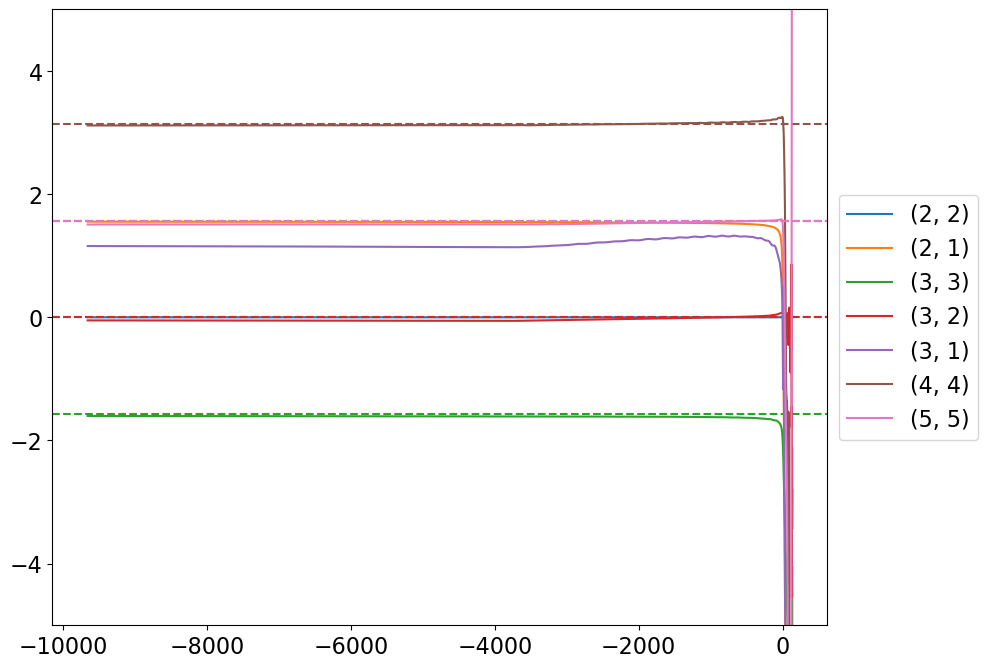

In [712]:
lms=[(2,2),(2,1),(3,3),(3,2), (3,1),(4,4),(5,5)]
# lms=[(2,2),(3,2),(4,4)]
plt.figure(figsize=(10,8), dpi=100)
if (np.around(q,2) == 1.0):
    lms_ = [(2,2), (3,2), (4,4), (5,4)]
else:
    lms_ = lms
for i, lm in enumerate(lms_):
    plt.plot(modes.times, modes.get_phase_from_strain(lm[0], lm[1]) - modes.get_phase_from_strain(2,2)/2 * lm[1], c=f'C{i}', label=lm)
    plt.axhline(delta_phi[lm], ls='--', c=f'C{i}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-5,5)
# plt.ylim(-10,5)
# plt.xlim(-100,100)

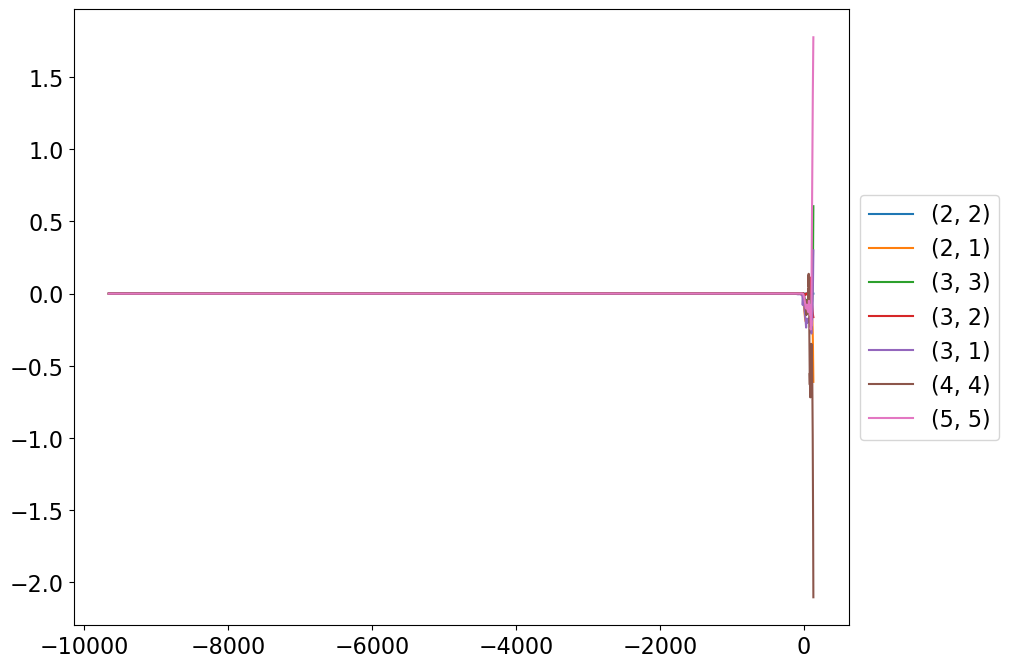

In [713]:
# lms=[(2,2),(2,1),(3,3), (5,5)]
filter_params = {'window_length':500, 'polyorder':3}
plt.figure(figsize=(10,8), dpi=100)
for i, lm in enumerate(lms):
    plt.plot(modes.times, modes.get_frequency_from_strain(lm[0], lm[1], filter_params) - modes.get_frequency_from_strain(2, 2, filter_params)/2 * lm[1], c=f'C{i}', label=lm)
# plt.ylim(-0.001,0.001)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [714]:
def is_odd(num):
    """
    return 1 for True (odd), 0 for False (even)
    """
    return num % 2

In [715]:
is_odd(2)

0

In [716]:
is_odd(lm[1])

1

In [717]:
def tetrad_convention_test(modes, lm, rel_err_tol=2):
    """
    https://arxiv.org/abs/2001.10914v2
    Appendix B: testing tetrad conventions
    when m is even the expected value seems to be 2*pi and not 0
    but maybe that is inaccuracy of the mod 2pi?
    yeah I think that is the reason.

    update: instead of mod 2pi, unwrap seems to work better

    update: seems like you have to unwrap, then mod 2pi then correct by 2pi if needed for even m modes

    update: still doesn't work for all cases

    update: unwrap, mod, unwrap then manually adjustment seems to work
    """
    value = (2*modes.get_phase_from_strain(lm[0], lm[1])) - (lm[1]*modes.get_phase_from_strain(2,2))
    value_mod = np.unwrap(value)
    value_mod = np.mod(value, 2*np.pi)
    value_mod = np.unwrap(value_mod)
    
    
    if is_odd(lm[1]) == True:
        expected_value = np.pi
    else:
        expected_value = 0
        v_bar = np.mean(value_mod[:100])
        print(v_bar)
    
        rel_err = (2*np.pi - v_bar) / (2*np.pi)*100
        print(rel_err)
        if rel_err < rel_err_tol:
            print("manually correcting by 2pi")
            value_mod = value_mod - 2*np.pi
        else:
            print("something wrong")
        
    print(f"expected_value: {expected_value}")
    plt.figure()
    plt.plot(modes.times, value_mod)
    plt.ylim(-10,10)
    plt.title(lm)
    plt.axhline(expected_value, c='k', ls='--');
    plt.show()
    plt.close()

0.0
100.0
something wrong
expected_value: 0


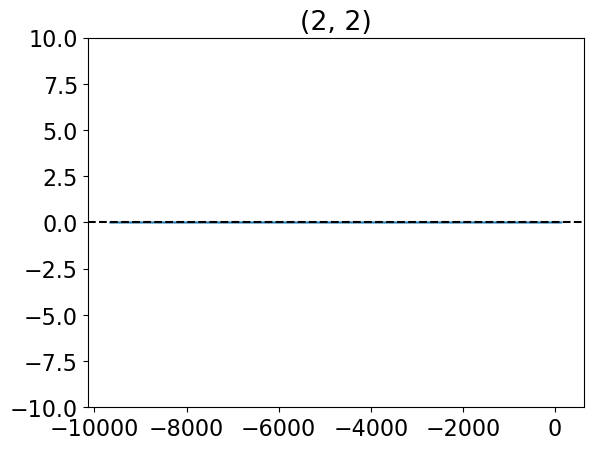

6.181781494462913
1.61389180422233
manually correcting by 2pi
expected_value: 0


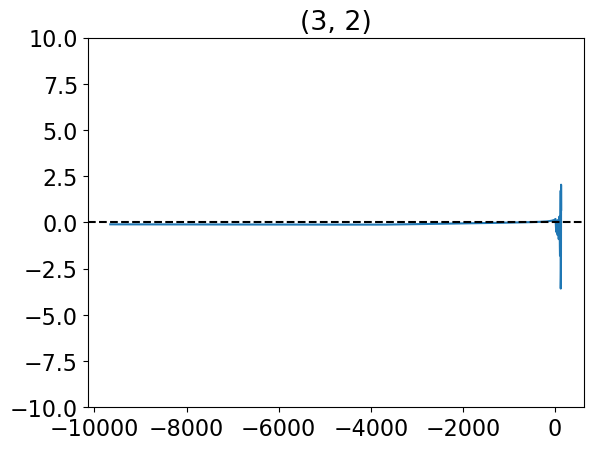

6.227437676265732
0.887251102560239
manually correcting by 2pi
expected_value: 0


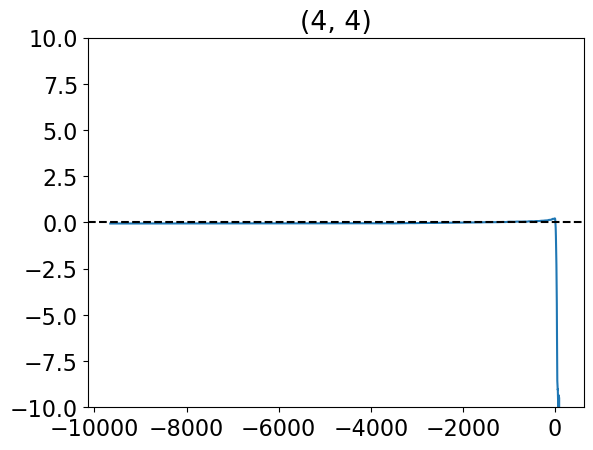

expected_value: 3.141592653589793


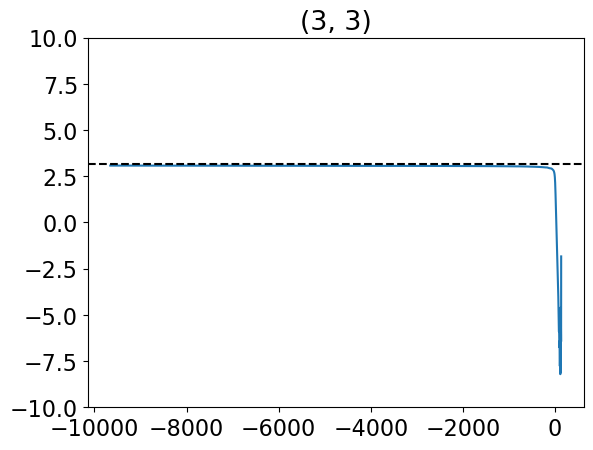

3.1415926535897927
50.000000000000014
something wrong
expected_value: 0


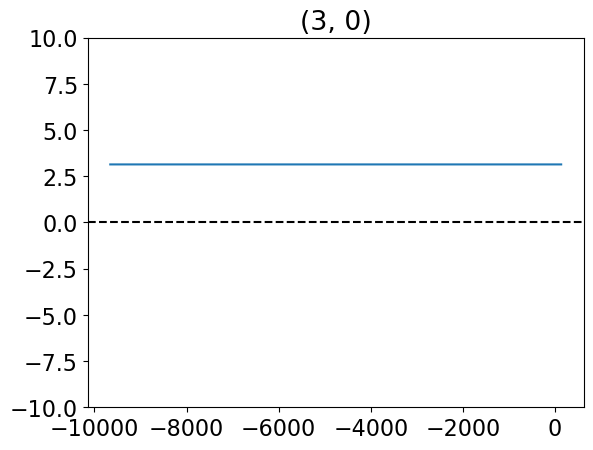

expected_value: 3.141592653589793


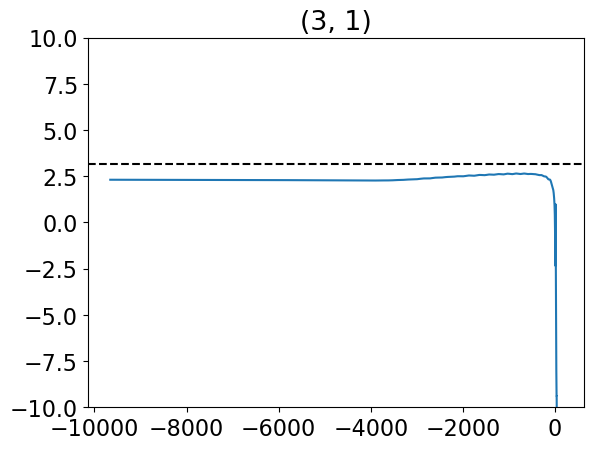

expected_value: 3.141592653589793


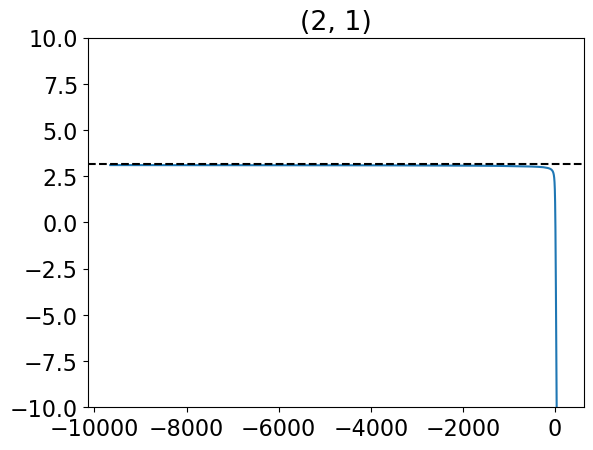

0.0
100.0
something wrong
expected_value: 0


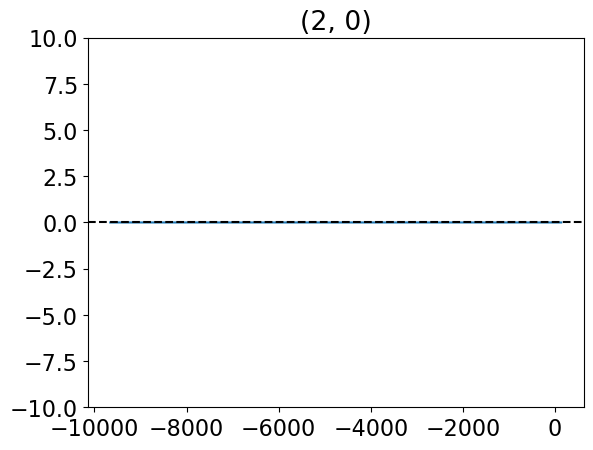

expected_value: 3.141592653589793


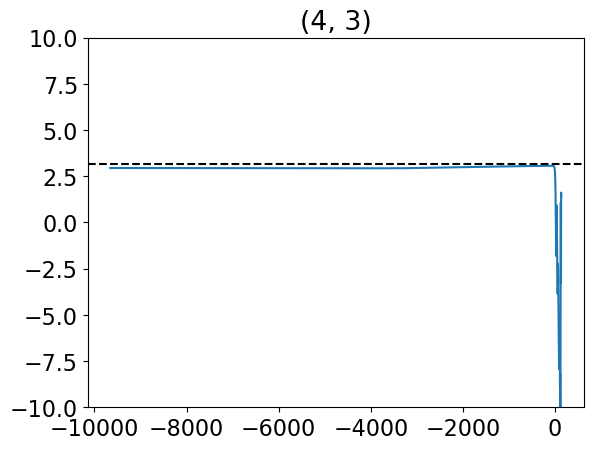

5.570594333331311
11.341237589062056
something wrong
expected_value: 0


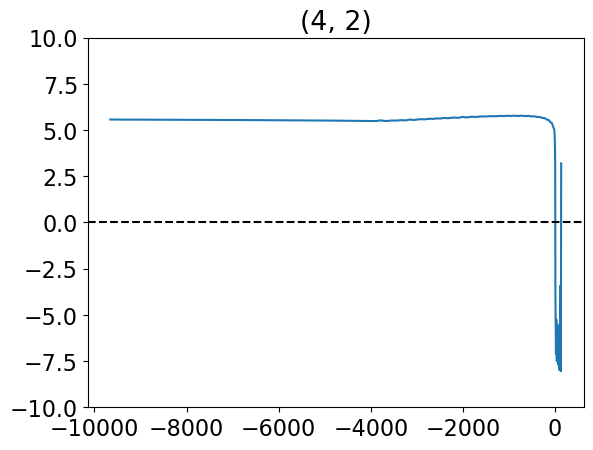

expected_value: 3.141592653589793


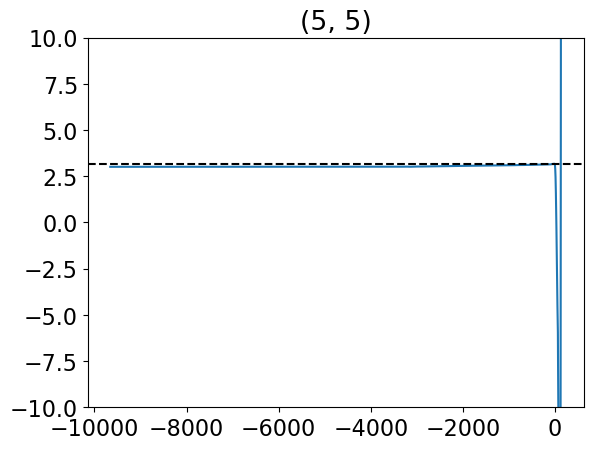

In [718]:

# lm=(2,1)
# lm=(3,2)
# lm = (3,3)
# lm=(4,4)
# lm=(4,3)
# lm = (5,5)


for lm in modes.h.keys():
    tetrad_convention_test(modes, lm)


# compare with NR

In [592]:
import qnm

# qnm.download_data()

In [593]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 640x480 with 0 Axes>

In [594]:
import re
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import numpy as np
import pandas as pd
import pathlib
import copy

In [595]:
import nr_utils

In [596]:
import lmfit

In [597]:
import scipy.optimize
from scipy.signal import savgol_filter

In [598]:
import phenom

In [599]:
### Need to modify this by the energy radiated as qnm assumes total mass of 1M i guess
def get_angular_ringdown_frequency_from_bbh(q, l, m, n=0):
    eta = phenom.eta_from_q(q)
    remnant_spin = phenom.remnant.FinalSpin0815(eta, 0, 0)
    e_rad = phenom.remnant.EradRational0815(eta, 0, 0)

    mc = qnm.modes_cache(s=-2,l=l,m=m,n=n)
    omega, _, _ = mc(a=remnant_spin)
    remnant_mass = (1 - e_rad)
    return np.real(omega) / remnant_mass
    
def get_angular_damping_frequency_from_bbh(q, l, m, n=0):
    eta = phenom.eta_from_q(q)
    remnant_spin = phenom.remnant.FinalSpin0815(eta, 0, 0)
    e_rad = phenom.remnant.EradRational0815(eta, 0, 0)

    mc = qnm.modes_cache(s=-2,l=l,m=m,n=n)
    omega, _, _ = mc(a=remnant_spin)
    remnant_mass = (1 - e_rad)
    return -np.imag(omega) / remnant_mass

In [600]:
get_angular_ringdown_frequency_from_bbh(1, 2, 2)

0.5534656465229616

In [601]:
get_angular_damping_frequency_from_bbh(1, 2, 2)

0.08542339187414541

In [602]:
phenom.remnant.FinalSpin0815(0.25, 0, 0)

0.6864170524001022

In [603]:
phenom.fring(0.25, 0, 0, 0.68)*2*np.pi

0.5506181900334295

In [604]:
phenom.fdamp(0.25, 0, 0, 0.68)*2*np.pi

0.08565716198829981

In [605]:
lms = [(2,2),(2,1),(3,3),(3,2),(3,1),(4,4),(4,3),(5,5),(5,4)]

In [606]:
nrfiles = [
    "/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5", #q=1
    "/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5", #q=2
    "/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5", #q=4
    "/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5", #q=5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0063_Res5.h5", #q=8
    "/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res3.h5", #q=10
    #
    "/Users/sebastian.khan/personal/data/SXS_BBH_0055_Res5.h5", #q=5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0166_Res5.h5", #q=6
    "/Users/sebastian.khan/personal/data/SXS_BBH_0168_Res5.h5", #q=3
    "/Users/sebastian.khan/personal/data/SXS_BBH_0295_Res5.h5", #q=4.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0296_Res5.h5", #q=5.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0294_Res4.h5", #q=3.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0297_Res5.h5", #q=6.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0298_Res5.h5", #q=7
    "/Users/sebastian.khan/personal/data/SXS_BBH_0299_Res5.h5", #q=7.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0300_Res5.h5", #q=8.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0301_Res5.h5", #q=9
    "/Users/sebastian.khan/personal/data/SXS_BBH_0302_Res5.h5", #q=9.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0007_Res5.h5", #q=1.5
    "/Users/sebastian.khan/personal/data/SXS_BBH_0186_Res3.h5", #q=8.27
    "/Users/sebastian.khan/personal/data/SXS_BBH_0259_Res5.h5", #q=2.5
]

In [607]:
def load_sxs_nr(nr_files, lms):
    qs=[]
    simnames=[]
    nr_data=[]
    for nrfile in nrfiles:
        simname = nrfile.split('/')[-1].split('.h5')[0]
        nrls = {}
        for l, m in lms:
            nrls[l,m] = nr_utils.NRLoader(
                handler='nr_hdf5',
                nr_hdf5_filename=nrfile,
                dt=0.1,
                safety_factor=0.5,
                ell=l,
                mm=m
            )
        nr_data.append(nrls)
        simnames.append(simname)
        qs.append(nrls[(2,2)].q)
    metadata=pd.DataFrame({'simname':simnames, 'q':qs})
    return metadata, nr_data

In [608]:
metadata, nr_data = load_sxs_nr(nrfiles, lms)

In [609]:
metadata

simname         q
0   SXS_BBH_0180_Res4  1.000000
1   SXS_BBH_0169_Res3  1.999973
2   SXS_BBH_0167_Res5  3.999987
3   SXS_BBH_0107_Res5  4.999988
4   SXS_BBH_0063_Res5  7.999969
5   SXS_BBH_0303_Res3  9.999928
6   SXS_BBH_0055_Res5  4.999987
7   SXS_BBH_0166_Res5  5.999979
8   SXS_BBH_0168_Res5  2.999992
9   SXS_BBH_0295_Res5  4.499990
10  SXS_BBH_0296_Res5  5.499985
11  SXS_BBH_0294_Res4  3.499994
12  SXS_BBH_0297_Res5  6.499975
13  SXS_BBH_0298_Res5  6.999971
14  SXS_BBH_0299_Res5  7.499967
15  SXS_BBH_0300_Res5  8.499956
16  SXS_BBH_0301_Res5  8.999951
17  SXS_BBH_0302_Res5  9.499946
18  SXS_BBH_0007_Res5  1.499999
19  SXS_BBH_0186_Res3  8.267457
20  SXS_BBH_0259_Res5  2.499997

In [610]:
nr_data[0]

{(2, 2): <nr_utils.NRLoader at 0x32d58b8e0>,
 (2, 1): <nr_utils.NRLoader at 0x28eae6c80>,
 (3, 3): <nr_utils.NRLoader at 0x2a6836ec0>,
 (3, 2): <nr_utils.NRLoader at 0x32d58b2e0>,
 (3, 1): <nr_utils.NRLoader at 0x32d589d80>,
 (4, 4): <nr_utils.NRLoader at 0x32d58a050>,
 (4, 3): <nr_utils.NRLoader at 0x32d58b490>,
 (5, 5): <nr_utils.NRLoader at 0x32d58be50>,
 (5, 4): <nr_utils.NRLoader at 0x32d588ee0>}

Text(0.5, 1.0, 'SXS_BBH_0180_Res4')

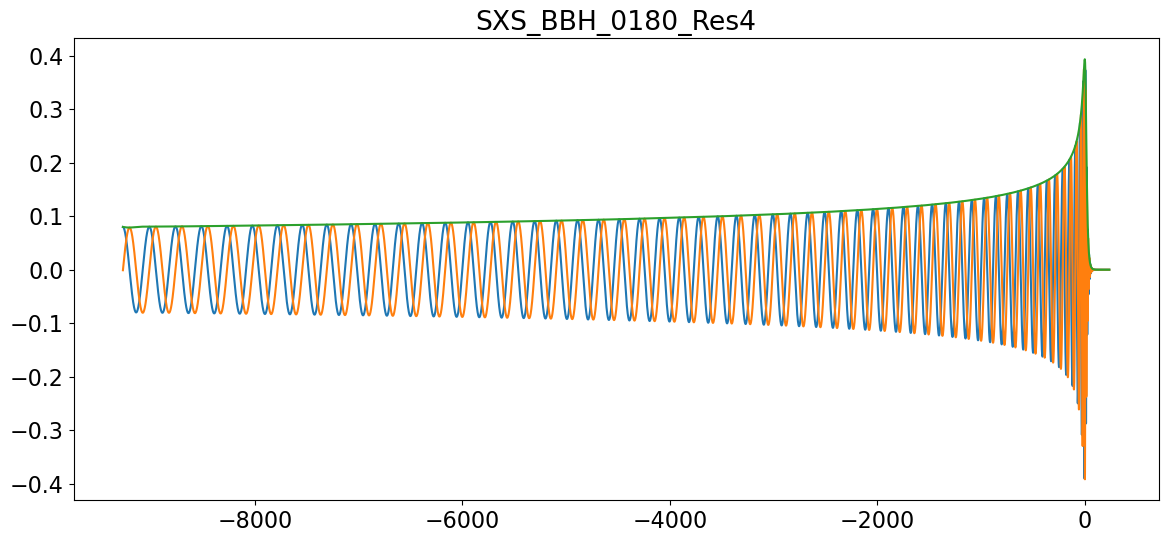

In [611]:
idx = 0
l_ = 2
m_ = 2

plt.figure(figsize=(14,6))
plt.plot(nr_data[idx][l_,m_].times, nr_data[idx][l_,m_].strain.real)
plt.plot(nr_data[idx][l_,m_].times, nr_data[idx][l_,m_].strain.imag)
plt.plot(nr_data[idx][l_,m_].times, np.abs(nr_data[idx][l_,m_].strain))
plt.title(metadata.iloc[idx]['simname'])
# plt.xlim(-100,100)

# compare waveforms

In [612]:
class ModesNR:
    def __init__(self, nr_data, t_min=None):
        nr_data = copy.deepcopy(nr_data)
        self.nr_data = nr_data
        self.times = self.nr_data[(2,2)].times

        self.t_min = t_min
        if self.t_min == None:
            self.t_min = self.times[0]
        if self.t_min != None:
            self.mask = self.times >= self.t_min
            self.times = self.times[self.mask]
            for lm in self.nr_data.keys():
                self.nr_data[lm].strain = self.nr_data[lm].strain[self.mask]
            
        
    def get_amp_from_strain(self, l, m):
        return np.abs(self.nr_data[(l, m)].strain)
        
    def get_phase_from_strain(self, l, m):
        return np.unwrap(np.angle(self.nr_data[(l, m)].strain))
        
    def get_frequency_from_strain(self, l, m, filter_params=None):
        f = IUS(self.times, self.get_phase_from_strain(l,m)).derivative()(self.times)

        if filter_params != None:
            return savgol_filter(f, filter_params['window_length'], filter_params['polyorder'])
        else:
            return f

    def rotate_modes_polarisation(self, psi):
        for lm in self.nr_data.keys():
            self.nr_data[lm].strain = self.nr_data[lm].strain * np.exp(1.j*psi)
            
    def rotate_modes_phase(self, phi0):
        for lm in self.nr_data.keys():
            self.nr_data[lm].strain = self.nr_data[lm].strain * np.exp(1.j*lm[1]*phi0)

In [613]:


# modes_nr = [ModesNR(nr_data[i]) for i in range(len(nr_data))]

In [614]:
metadata

simname         q
0   SXS_BBH_0180_Res4  1.000000
1   SXS_BBH_0169_Res3  1.999973
2   SXS_BBH_0167_Res5  3.999987
3   SXS_BBH_0107_Res5  4.999988
4   SXS_BBH_0063_Res5  7.999969
5   SXS_BBH_0303_Res3  9.999928
6   SXS_BBH_0055_Res5  4.999987
7   SXS_BBH_0166_Res5  5.999979
8   SXS_BBH_0168_Res5  2.999992
9   SXS_BBH_0295_Res5  4.499990
10  SXS_BBH_0296_Res5  5.499985
11  SXS_BBH_0294_Res4  3.499994
12  SXS_BBH_0297_Res5  6.499975
13  SXS_BBH_0298_Res5  6.999971
14  SXS_BBH_0299_Res5  7.499967
15  SXS_BBH_0300_Res5  8.499956
16  SXS_BBH_0301_Res5  8.999951
17  SXS_BBH_0302_Res5  9.499946
18  SXS_BBH_0007_Res5  1.499999
19  SXS_BBH_0186_Res3  8.267457
20  SXS_BBH_0259_Res5  2.499997

simname         q
19  SXS_BBH_0186_Res3  8.267457

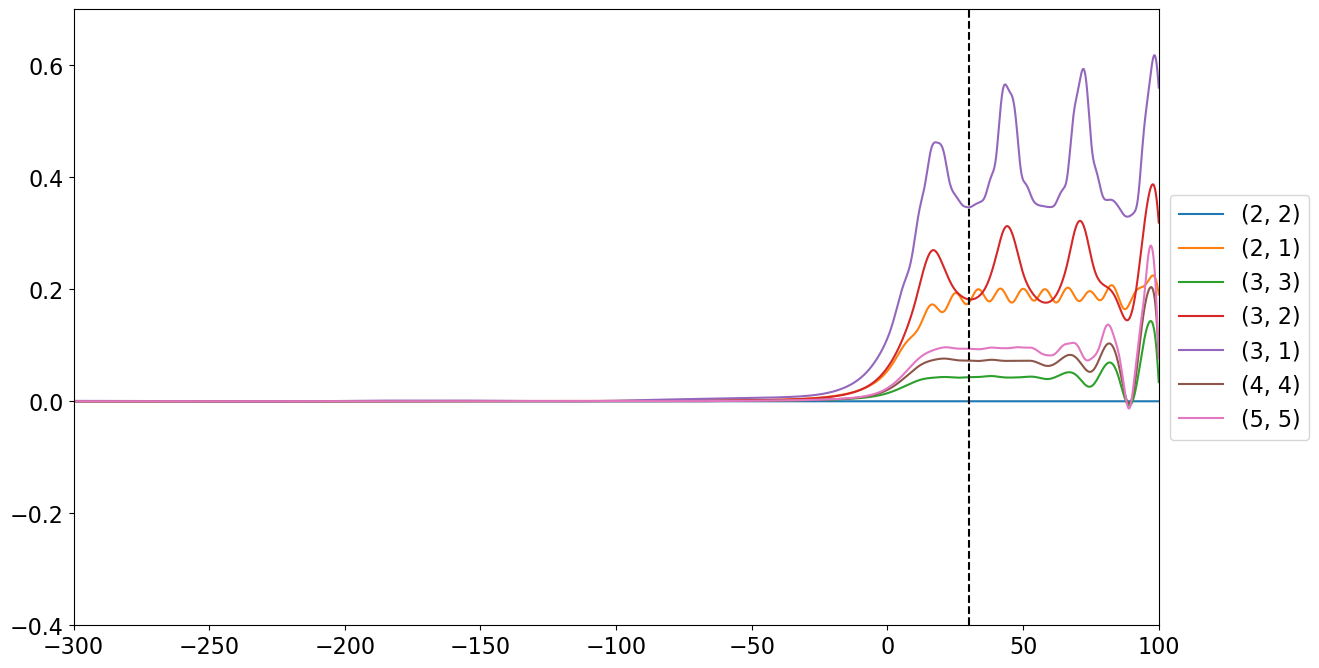

In [738]:
idx=19
mode_nr = ModesNR(nr_data[idx])
display(metadata.iloc[[idx]])


# filter_params = None
filter_params = {'window_length':100, 'polyorder':2}
plt.figure(figsize=(14,8), dpi=100)
if (np.around(metadata.iloc[[idx]]['q'].values[0],2) == 1.0):
    lms_ = [(2,2), (3,2), (4,4), (5,4)]
else:
    lms_ = lms
for lm in lms_:
    plt.plot(mode_nr.times, mode_nr.get_frequency_from_strain(lm[0], lm[1], filter_params) - mode_nr.get_frequency_from_strain(2,2, filter_params)/2 * lm[1], label=lm)
    # plt.plot(mode_nr.times, mode_nr.get_frequency_from_strain(lm[0], lm[1], filter_params) - mode_nr.get_frequency_from_strain(2,2, filter_params), label=lm)
plt.ylim(-0.4, 0.7)
plt.xlim(-300, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(30, c='k', ls='--')

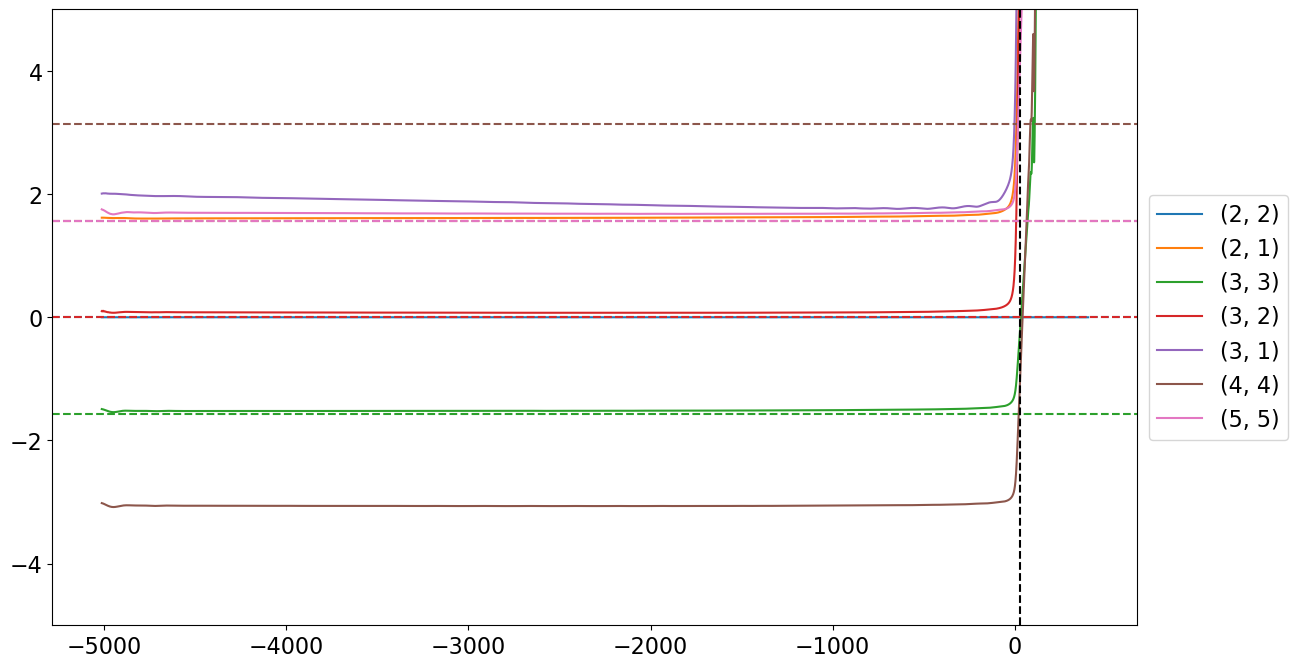

In [739]:
plt.figure(figsize=(14,8), dpi=100)
if (np.around(metadata.iloc[[idx]]['q'].values[0],2) == 1.0):
    lms_ = [(2,2), (3,2), (4,4), (5,4)]
else:
    lms_ = lms
for i, lm in enumerate(lms_):
    plt.plot(mode_nr.times, mode_nr.get_phase_from_strain(lm[0], lm[1]) - mode_nr.get_phase_from_strain(2,2)/2 * lm[1], c=f'C{i}', label=lm)
    plt.axhline(delta_phi[lm], ls='--', c=f'C{i}')
plt.ylim(-5,5)
# plt.xlim(-300, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(30, c='k', ls='--')

0.0
100.0
something wrong
expected_value: 0


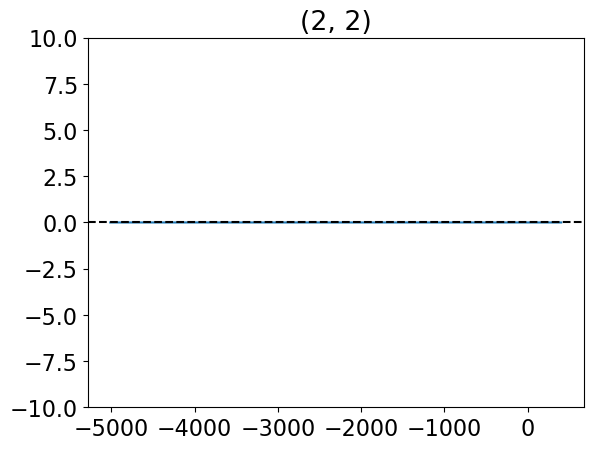

expected_value: 3.141592653589793


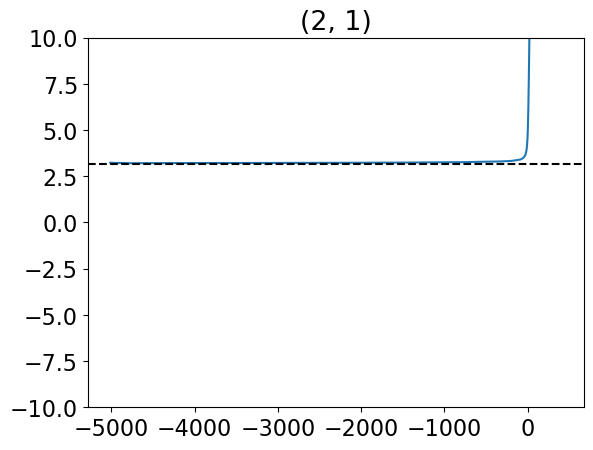

expected_value: 3.141592653589793


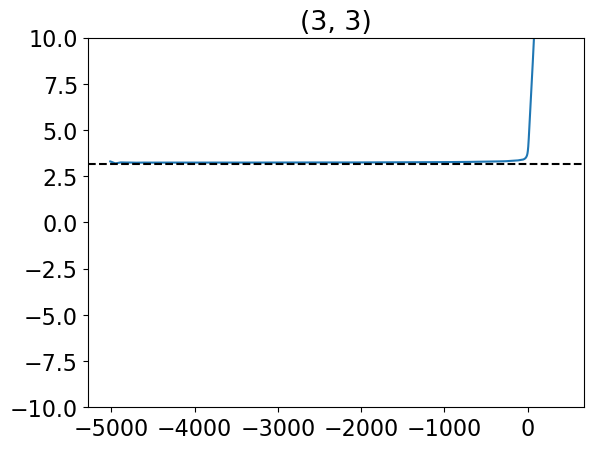

0.20160594855623185
96.79134167305455
something wrong
expected_value: 0


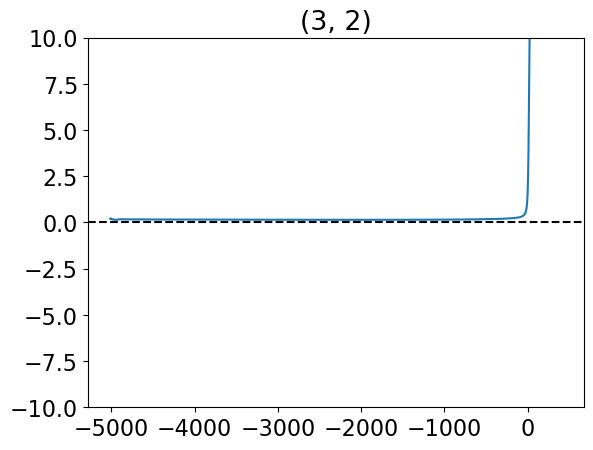

expected_value: 3.141592653589793


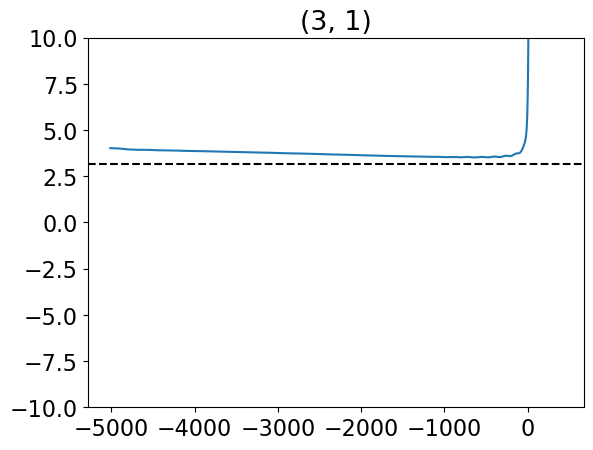

0.23928471465540432
96.19166548562586
something wrong
expected_value: 0


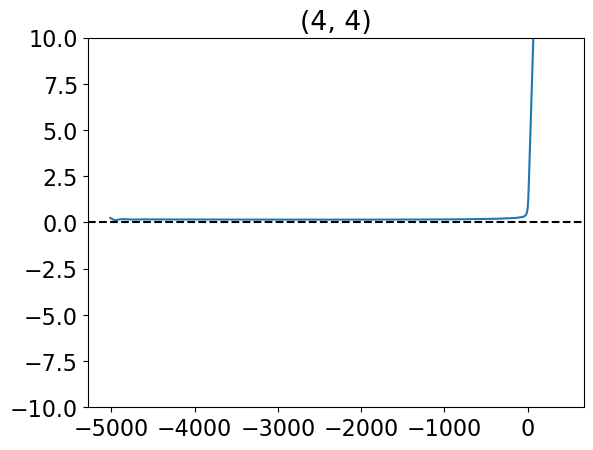

expected_value: 3.141592653589793


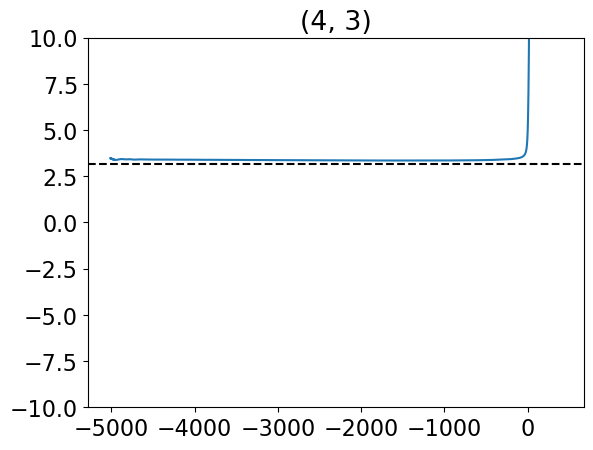

expected_value: 3.141592653589793


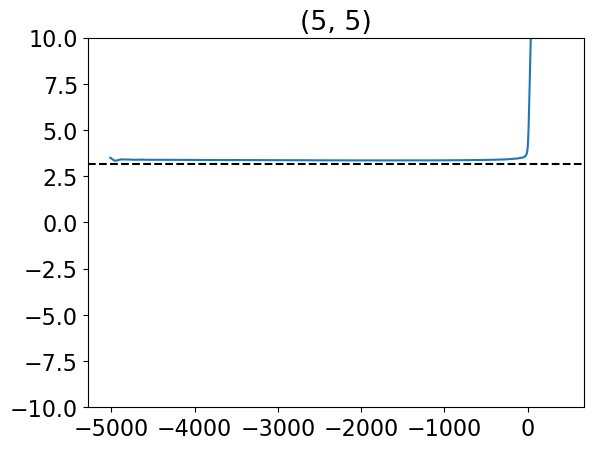

0.44618089397363625
92.8988105210935
something wrong
expected_value: 0


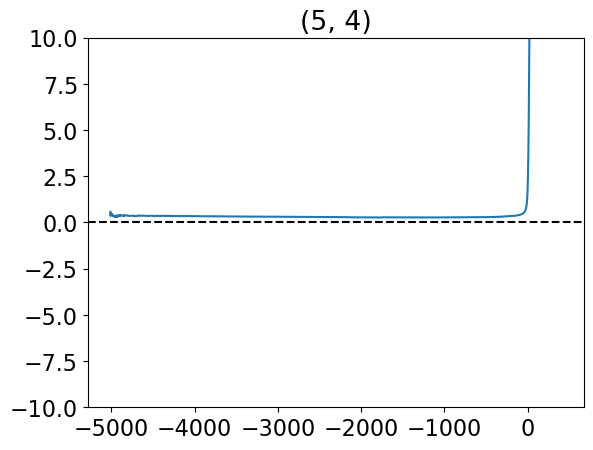

In [740]:
for lm in mode_nr.nr_data.keys():
    tetrad_convention_test(mode_nr, lm, 2)